# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2
from keras.optimizers import SGD
import scipy.stats
from scipy.stats import gaussian_kde
import re
import ast
import random
from sklearn import preprocessing

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1ZPFvTkWltdp3V_wG7wxaszc7qrVQ96Vz"})   # replace the id with id of file you want to access
downloaded.GetContentFile('ted.csv')        # replace the file name with your file

In [ ]:
ted_dataset = pd.read_csv('ted.csv')
ted_dataset.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


**Cleaning and formating the data**

In [ ]:
# Check the number of missing values
ted_dataset.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [ ]:
# Clarify continuous values and Object/Categorical ones
ted_dataset.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [ ]:
# Drop the name column due to its unnecessary element for our data analysis 
ted_dataset = ted_dataset.drop(['name'], axis = 1)
ted_dataset.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'num_speaker', 'published_date', 'ratings',
       'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views'],
      dtype='object')

In [ ]:
# Convert the date column values
from datetime import datetime
def convert(x):
    return pd.to_datetime(x,unit='s')
ted_dataset['film_date'] = ted_dataset['film_date'].apply(convert)
ted_dataset['published_date'] = ted_dataset['published_date'].apply(convert)
ted_dataset.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


**Performing Exploratory Data Analysis**

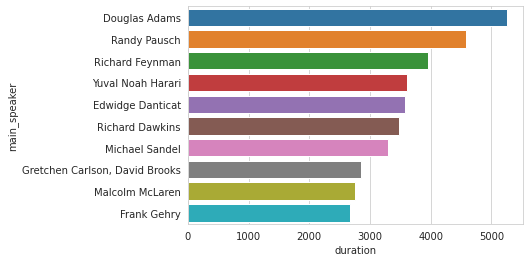

In [ ]:
# Top 10 the most frequent speakers
sns.set_style('whitegrid')
ax = sns.barplot(x="duration", y="main_speaker", data=ted_dataset.sort_values('duration', ascending=False)[:10])

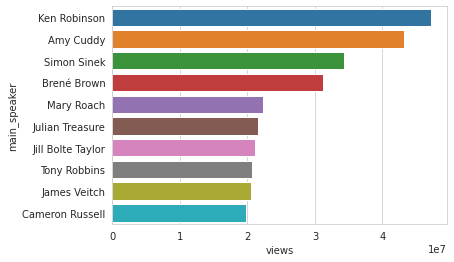

In [ ]:
# Top 10 speakers getting the most views
sns.set_style('whitegrid')
ax = sns.barplot(x="views", y="main_speaker", data=ted_dataset.sort_values('views', ascending=False)[:10])

In [ ]:
# Top 10 the most famous speakers according to comments
ted_dataset[['title', 'main_speaker','views', 'comments', 'duration']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments,duration
96,Militant atheism,Richard Dawkins,4374792,6404,1750
0,Do schools kill creativity?,Ken Robinson,47227110,4553,1164
644,Science can answer moral questions,Sam Harris,3433437,3356,1386
201,My stroke of insight,Jill Bolte Taylor,21190883,2877,1099
1787,How do you explain consciousness?,David Chalmers,2162764,2673,1117
954,Taking imagination seriously,Janet Echelman,1832930,2492,566
840,On reading the Koran,Lesley Hazleton,1847256,2374,573
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290,1262
661,The danger of science denial,Michael Specter,1838628,2272,1141
677,How great leaders inspire action,Simon Sinek,34309432,1930,1084


In [ ]:
# Top months that hold the most talkshows
talk_month = pd.DataFrame(ted_dataset['film_date'].map(lambda x: x.month).value_counts()).reset_index()
talk_month.columns = ['month', 'talks']
talk_month.head()

,month,talks
0,2,601
1,3,397
2,6,270
3,7,253
4,11,232


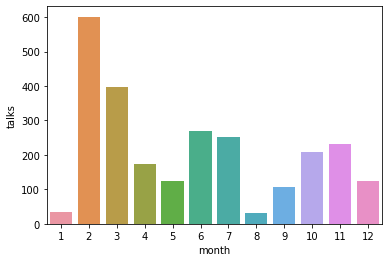

In [ ]:
sns.barplot(x='month', y='talks', data=talk_month)

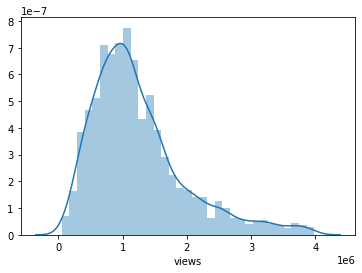

In [ ]:
# Distribution of views
sns.distplot(ted_dataset[ted_dataset['views'] < 0.4e7]['views'])

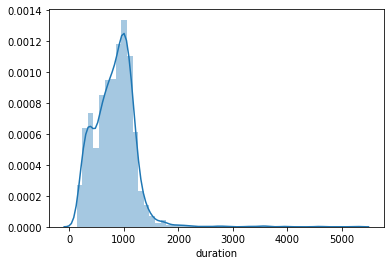

In [ ]:
# Distribution of duration
sns.distplot(ted_dataset[ted_dataset['duration'] < 0.4e7]['duration'])

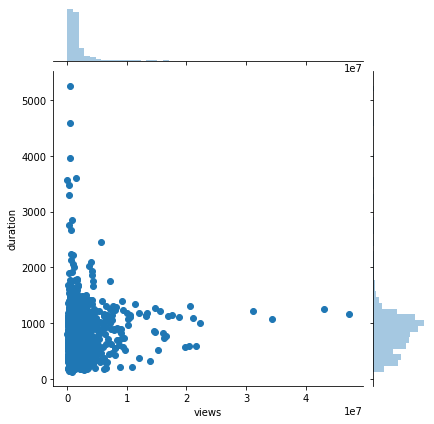

In [ ]:
# The correlation between view and duration
ax = sns.jointplot(x='views', y='duration', data=ted_dataset)

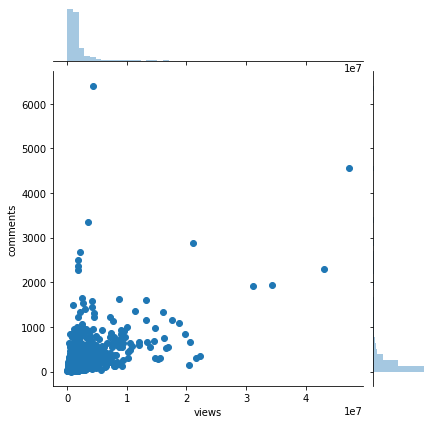

In [ ]:
# The correlation between views and comments
sns.jointplot(x='views', y='comments', data=ted_dataset)

**The correlation between rankings**

<pre>Measuring ratings
Positive: Funny, Courageous, Beautiful, Informative, Inspiring, Fascinating, Ingenious, Persuasive, Jaw-dropping
Negative: Confusing, Unconvincing, Longwinded, Obnoxious, OK </pre>


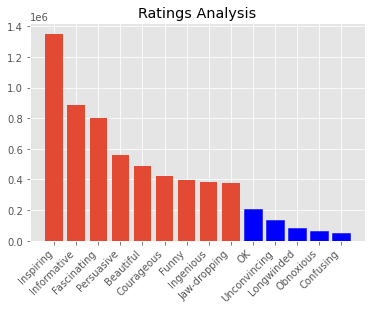

In [ ]:
ted_dataset['ratings'] = ted_dataset['ratings'].apply(lambda x: eval(str(x))) #turns stringified dictionary into python dictionary
counter = {'Funny':0, 'Beautiful':0, 'Ingenious':0, 'Courageous':0, 'Longwinded':0, 'Confusing':0, 'Informative':0, 'Fascinating':0, 'Unconvincing':0,
           'Persuasive':0, 'Jaw-dropping':0, 'OK':0, 'Obnoxious':0, 'Inspiring':0}

for i in range(len(ted_dataset['ratings'])):
    for j in range(len(ted_dataset['ratings'][i])):
        counter[ted_dataset['ratings'][i][j]['name']] += ted_dataset['ratings'][i][j]['count']

frequencies = list(counter.values())
descr = counter.keys()
descriptors = [x for _,x in sorted(zip(frequencies,counter.keys()), reverse=True)]
neg_descriptors = {"Confusing", "Unconvincing", "Longwinded", "Obnoxious", "OK"}
neg_indices  = [x for x in range (len(descriptors)) if descriptors[x] in neg_descriptors]
frequencies.sort(reverse=True)

indices = np.arange(len(descriptors))
bar = plt.bar(indices, frequencies, 0.8)
[bar[i].set_color('b') for i in neg_indices]
plt.xticks(indices, descriptors, rotation=45, ha="right")
plt.title("Ratings Analysis")
plt.show()


In [ ]:
# Prove: the average TED viewer to leave positive feedback over negative feedback
ted_dataset['aggregateRatings'] = ted_dataset['ratings'].apply(lambda x: \
                                            x[0]['count']+ \
                                            x[1]['count']- \
                                            x[2]['count']+ \
                                            x[3]['count']- \
                                            x[4]['count']- \
                                            x[5]['count']+ \
                                            x[6]['count']+ \
                                            x[7]['count']+ \
                                            x[8]['count']+ \
                                            x[9]['count']+ \
                                            x[10]['count']+ \
                                            x[11]['count']- \
                                            x[12]['count']- \
                                            x[13]['count'])
                                            

ar = ted_dataset['aggregateRatings']

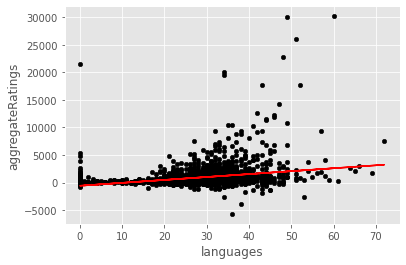

In [ ]:
# The correlation between aggregateRatings and languages
ted_dataset.plot.scatter(x='languages',y='aggregateRatings',color='black')
#define convenience function for trend lines
def plotTrendLine(x,y,data=ted_dataset,color='red',logx=False,logy=False):
    oldx = np.reshape(data[x].values,(-1,))
    oldy = np.reshape(data[y].values,(-1,))
    tempx = oldx if not logx else np.log10(oldx)
    tempy = oldy if not logy else np.log10(oldy)
    
    idx = np.isfinite(tempx) & np.isfinite(tempy)
    z = np.polyfit(tempx[idx],tempy[idx],1)
    tempy = z[0]*tempx+z[1]
    plt.plot(oldx,tempy,color=color)
    return z
plotTrendLine('languages','aggregateRatings');

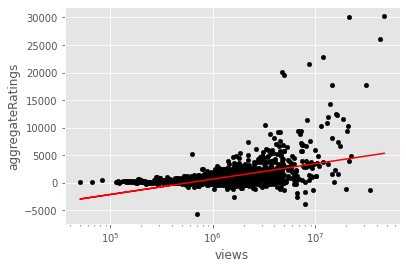

In [ ]:
# The correlation between aggregateRatings and views
ted_dataset.plot.scatter(x='views',y='aggregateRatings',color='black')
plotTrendLine('views','aggregateRatings',logx=True);
plt.xscale('log')

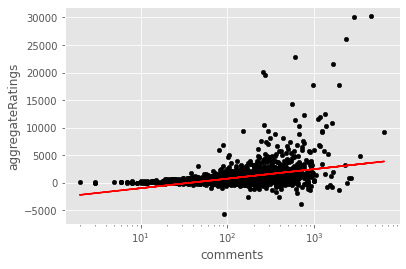

In [ ]:
# The correlation between aggregateRatings and views
ted_dataset.plot.scatter(x='comments',y='aggregateRatings',color='black')
plotTrendLine('comments','aggregateRatings',logx=True);
plt.xscale('log')

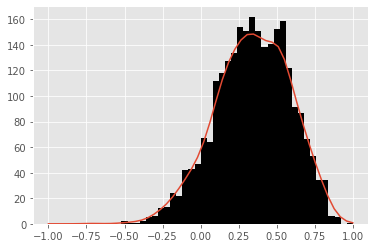

In [ ]:
# histogram of per-view ratings
ted_dataset['totalRatings'] = ted_dataset['ratings'].apply(lambda x: sum([x[i]['count'] for i in range(len(x))]))

ted_dataset['avgPerRating'] = ted_dataset['aggregateRatings']/ted_dataset['totalRatings']
plt.hist(x=ted_dataset['avgPerRating'],bins=50,range=(-1,1),color='black')
#convenience function for density curve plotting
def plotDensityCurve(x,linspace,covariance_factor=0.25,multiplier=1,data=ted_dataset,color='red'):
    tempx = np.reshape(data[x].values,(-1,)) if data is not None else x
    density = gaussian_kde(tempx)
    xs = np.linspace(linspace[0],linspace[1],linspace[2])
    density.covariance_factor = lambda: covariance_factor
    density._compute_covariance()
    plt.plot(xs,density(xs)*multiplier)
plotDensityCurve('avgPerRating',(-1,1,50),multiplier=100)

Slope: 0.007488309986803437


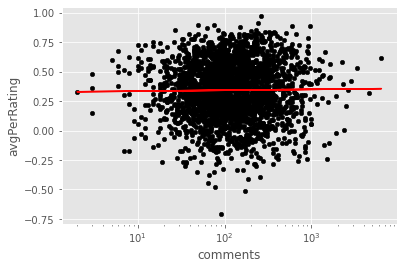

In [ ]:
ted_dataset.plot.scatter(x='comments',y='avgPerRating',color='black')
coeffs = plotTrendLine('comments','avgPerRating',logx=True);
plt.xscale('log')
print("Slope: "+str(coeffs[0]))


Slope: 0.018296978661601383


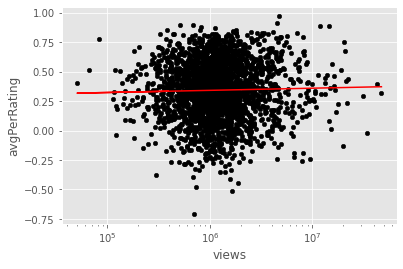

In [ ]:
ted_dataset.plot.scatter(x='views',y='avgPerRating',color='black')
coeffs = plotTrendLine('views','avgPerRating',logx=True);
plt.xscale('log')
print("Slope: "+str(coeffs[0]))

Number of groups: 344
Largest Group Size: 7
Smallest Group Size: 2
Average Group Size: 6.718023255813954


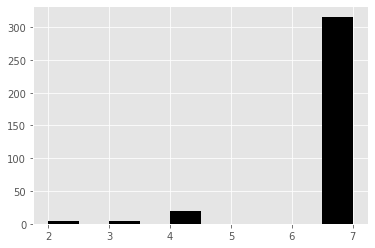

In [ ]:
# find groups of videos which are connected
ted_dataset['related_talks'] = ted_dataset['related_talks'].apply(lambda x: eval(str(x)))

groups = {}
for i in range(len(ted_dataset)):
    cur = ted_dataset['title'][i]
    related = [ted_dataset['related_talks'][i][j]['title'] for j in range(len(ted_dataset['related_talks'][i]))]
    groups[cur] = set(related)
    groups[cur].add(cur)
    for rel in related:
        if rel in groups and rel != cur:
            groups[cur].union(groups.pop(rel))
                   
groups = [g for g in groups.values() if len(g) > 0]
lens = [len(t) for t in groups]

plt.hist(lens,color='black')
print("Number of groups: " + str(len(groups)))
print("Largest Group Size: " + str(max(lens)))
print("Smallest Group Size: " + str(min(lens)))
print("Average Group Size: " + str(np.mean(lens)))

Standard deviation for the set: 0.24348928007078519
Average standard deviation among groups: 0.21433531476920234


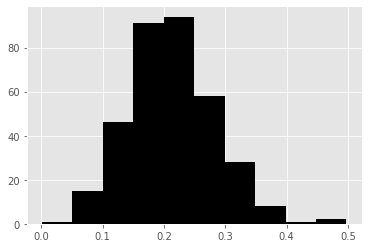

In [ ]:
# Compare the standard deviation for the set to the average standard deviation among groups
title_to_id = {}
for i in range(len(ted_dataset)):
    title_to_id[ted_dataset['title'][i]] = i

group_avg = []
for g in groups:
    group_avg.append([ted_dataset['avgPerRating'][title_to_id[title]] for title in g])

group_std = [np.std(nums) for nums in group_avg]
plt.hist(group_std,color='black')
print("Standard deviation for the set: " + str(np.std(ted_dataset['avgPerRating'])))
print("Average standard deviation among groups: " + str(np.mean(group_std)))

# Conclude: the relatedness of two videos is not a strong indicator of their quality


**Apply Machine Learning to predict ratings per view based on various factors**

In [ ]:
ted_dataset.sample()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,aggregateRatings,totalRatings,avgPerRating
1222,269,Fifteen-year-old Tavi Gevinson had a hard time...,450,TEDxTeen,1333152000,30,Tavi Gevinson,Tavi Gevinson: A teen just trying to figure it...,1,1336226312,"[{'id': 11, 'name': 'Longwinded', 'count': 44}...","[{'id': 866, 'hero': 'https://pe.tedcdn.com/im...",Blogger and fashion icon,"['TEDx', 'entertainment', 'fashion', 'feminism...",A teen just trying to figure it out,https://www.ted.com/talks/tavi_gevinson_a_teen...,1447603,922,2042,0.451518


In [ ]:
mldf = ted_dataset[['num_speaker','duration','comments','languages','views', 'film_date', 'published_date']]

In [ ]:
mldf['descriptionSentiment'] = ted_dataset['description'].apply(lambda x:TextBlob(re.sub(r'[^\x00-\x7f]',r'',x)).sentiment.polarity)
print("Sentiment: ")
print(mldf['descriptionSentiment'].head())
print("Description: ")
print(ted_dataset['description'].head())

Sentiment: 
0    0.291667
1   -0.115909
2   -0.081981
3    0.000000
4    0.000000
Name: descriptionSentiment, dtype: float64
Description: 
0    Sir Ken Robinson makes an entertaining and pro...
1    With the same humor and humanity he exuded in ...
2    New York Times columnist David Pogue takes aim...
3    In an emotionally charged talk, MacArthur-winn...
4    You've never seen data presented like this. Wi...
Name: description, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ted_dataset['tags'] = ted_dataset['tags'].apply(lambda x:eval(str(x)))
all_tags = {}
count = 0
for talk in ted_dataset['tags']:
    for tag in talk:
        if not tag in all_tags:
            all_tags[tag] = count
            count = count+1
onehot = np.zeros((0,count))
for talk in ted_dataset['tags']:
    temp = np.zeros((1,count))
    for tag in talk:
        temp[0,all_tags[tag]] = 1
    onehot = np.concatenate((onehot,temp),0)

In [ ]:
mldf_np = mldf.values
all_y = np.reshape(ted_dataset['avgPerRating'].values,(-1,1))
all_x = np.concatenate((mldf_np,onehot),1)
combined = np.concatenate((all_x,all_y),1)
np.random.shuffle(combined)
data_size = np.shape(all_y)[0]
train_size = (int)(data_size*0.75)
feature_size = np.shape(all_x)[1]
x_train = combined[0:train_size,0:feature_size]
y_train = np.reshape(combined[0:train_size,feature_size],(-1,1))
x_val = combined[train_size:data_size,0:feature_size]
y_val = np.reshape(combined[train_size:data_size,feature_size],(-1,1))

In [ ]:
import keras.optimizers as op
from keras.layers import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape=(feature_size,)))
model.add(Dense(1,kernel_regularizer=l2(0.01)))
model.compile(loss='mean_squared_error',optimizer="adam")
history = model.fit(x=x_train,y=y_train,batch_size=64,epochs=50,validation_data=(x_val,y_val))

Train on 1912 samples, validate on 638 samples
Epoch 1/50
1912/1912 [==============================] - 0s 216us/step - loss: 0.7308 - val_loss: 0.3752
Epoch 2/50
1912/1912 [==============================] - 0s 29us/step - loss: 0.4674 - val_loss: 0.1864
Epoch 3/50
1912/1912 [==============================] - 0s 27us/step - loss: 0.3389 - val_loss: 0.1279
Epoch 4/50
1912/1912 [==============================] - 0s 31us/step - loss: 0.2518 - val_loss: 0.1010
Epoch 5/50
1912/1912 [==============================] - 0s 30us/step - loss: 0.1905 - val_loss: 0.0917
Epoch 6/50
1912/1912 [==============================] - 0s 27us/step - loss: 0.1540 - val_loss: 0.0890
Epoch 7/50
1912/1912 [==============================] - 0s 30us/step - loss: 0.1256 - val_loss: 0.0876
Epoch 8/50
1912/1912 [==============================] - 0s 27us/step - loss: 0.1064 - val_loss: 0.0874
Epoch 9/50
1912/1912 [==============================] - 0s 28us/step - loss: 0.0935 - val_loss: 0.0881
Epoch 10/50
1912/1912 [==

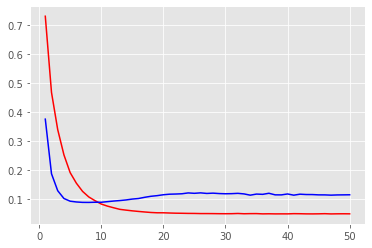

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1,len(loss)+1)
plt.plot(epochs,loss,color='red')
plt.plot(epochs,val_loss,color='blue')

In [ ]:
all_weights_temp = model.layers[1].get_weights()[0]
all_weights = []
for weight in all_weights_temp:
    all_weights.append(weight[0])
existing_weights = all_weights[:6]
tag_weights = all_weights[6:]

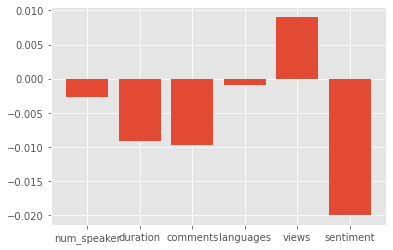

In [ ]:
fig,ax = plt.subplots()
index = np.arange(0,6)
ax.bar(index,existing_weights)
ax.set_xticklabels(('','num_speaker','duration','comments','languages','views','sentiment'))
plt.show()

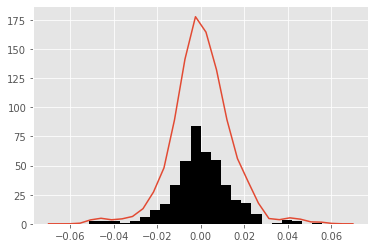

In [ ]:
plt.hist(x=tag_weights,bins=30,range=(-0.07,0.07),color='black')
plotDensityCurve(tag_weights,(-0.07,0.07,30),0.25,5,data=None)

In [ ]:
inverted_tags = dict([v,k] for k,v in all_tags.items())
tag_columns = ('features',)
tag_df = pd.DataFrame({'features': tag_weights})
best_tags = tag_df.sort_values('features',ascending=False).head(10).index.tolist()
for tag in best_tags:
    print(inverted_tags[tag]) if tag in inverted_tags else ""

meme
blockchain
women in business
china
ecology
piano
poverty
food
jazz
TEDMED


In [ ]:
worst_tags = tag_df.sort_values('features',ascending=True).head(10).index.tolist()
for tag in worst_tags:
    print(inverted_tags[tag]) if tag in inverted_tags else ""

identity
farming
failure
india
exoskeleton
driverless cars
cyborg
monkeys
discovery
heart health


In [ ]:
s = ted_dataset.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_df = ted_dataset.drop('tags', axis=1).join(s)
theme_df.head()
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
top_themes = pop_themes.head(20)
top_themes

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


In [ ]:
top_theme_list = []
for theme in top_themes['theme'].tolist():
    top_theme_list.append((theme,tag_df['features'].tolist()[all_tags[theme]]))
sorted_list = sorted(top_theme_list,key=lambda x: -x[1])
theme_list = []
weight_list = []
for pair in sorted_list:
    theme_list.append(pair[0])
    weight_list.append(pair[1])

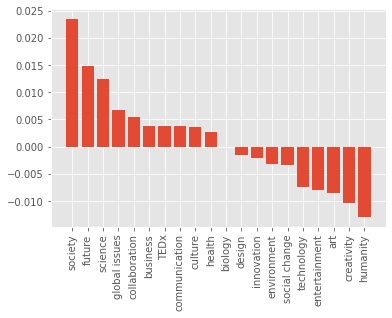

In [ ]:
fig,ax = plt.subplots()
index = np.arange(0,20)
ax.bar(index,weight_list)
ax.set_xticklabels(theme_list)
plt.xticks(index)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

**Dashboard Presentation**

https://public.tableau.com/profile/hoa2000kxpt#!/vizhome/VnHa_Assignment04_Dashboard/Dashboard1?publish=yes

**Reference**

*   https://towardsdatascience.com/ted-talks-analysis-eda-for-beginners-df346bc431a6
*   https://www.kaggle.com/lpang36/analysis-of-ted-talk-ratings

